# Predicting Price of Houses.

## 1. Problem Definition



## 2. Data

There are twomain datasets.
* Train Set - to train the model
* Test Set - to test the model

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error)

## 4. Features

The features in the given dataset are given in `data_description.txt` file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
#Import trainign set
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
df = pd.read_csv("Data/train.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [7]:
# Turn all of the string value into category value
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [9]:
df.ExterQual.cat.codes

0       2
1       3
2       2
3       3
4       2
       ..
1455    3
1456    3
1457    0
1458    3
1459    2
Length: 1460, dtype: int8

In [10]:
# Check missing data

df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [11]:
# Check numureic columns
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [12]:
# Check for which numeric column has null values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [13]:
# Fill Numeric null value with MEDIAN
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df[label+"_is_Missing"] = pd.isnull(content)
            # Fill missing numeric value with median
            df[label] = content.fillna(content.median())

In [14]:
# Check again for which numeric column has null values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [15]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column which tells us if the data was missing
        df[label+"_is_Missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [16]:
pd.Categorical(df["ExterQual"]).codes

array([2, 3, 2, ..., 0, 3, 2], dtype=int8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_Missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [18]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
PoolQC_is_Missing,True,True,True,True,True
Fence_is_Missing,True,True,True,True,True
MiscFeature_is_Missing,True,True,True,True,True
SaleType_is_Missing,False,False,False,False,False


In [19]:
df.sort_values(by=["YearBuilt"], inplace=True, ascending=True)

In [20]:
df.YearBuilt

1349    1872
1137    1875
747     1880
304     1880
1132    1880
        ... 
898     2009
515     2009
157     2009
762     2009
378     2010
Name: YearBuilt, Length: 1460, dtype: int64

### Now as all the data is numeric and has no missing value, we can do the modelling.

In [21]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df.drop("SalePrice", axis=1), df["SalePrice"])

Wall time: 1 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [22]:
# Score the model
model.score(df.drop("SalePrice", axis=1), df["SalePrice"])

0.9791484076136823

### Splitting data into train/validation sets

In [23]:
# Splitting data
df_val = df[df.YearBuilt <2005]
df_train = df[df.YearBuilt >= 2005]

len(df_val), len(df_train)

(1238, 222)

In [24]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((222, 126), (222,), (1238, 126), (1238,))

### Building am evaluation function

In [25]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between 
    predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different model

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds),
              "Valid RMSE": mean_squared_error(np.log(y_valid), np.log(val_preds), squared=False)}
    return scores

In [26]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model.fit(X_train, y_train)

Wall time: 195 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
show_scores(model)

{'Training MAE': 9865.194594594594,
 'Valid MAE': 46165.109168012925,
 'Training RMSLE': 0.0657314016985176,
 'Valid RMSLE': 0.35051513003079765,
 'Training R^2': 0.9667004329352393,
 'Valid R^2': 0.28791685775937004,
 'Valid RMSE': 0.350517779069835}

### Hyperparameter tuning with RandomizedSearchCV

In [28]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5,1, "sqrt", "auto"]}

#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True)

#Fit the RandomizedSearchCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 39.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [29]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [30]:
show_scores(rs_model)

{'Training MAE': 17647.16860468414,
 'Valid MAE': 54404.69387567823,
 'Training RMSLE': 0.10256632117465897,
 'Valid RMSLE': 0.4025480723730036,
 'Training R^2': 0.9012081785706603,
 'Valid R^2': 0.13026330601115232,
 'Valid RMSE': 0.4025510727583989}

In [31]:
df.OverallQual

1349     8
1137     5
747      7
304      7
1132     6
        ..
898      9
515     10
157      8
762      7
378      9
Name: OverallQual, Length: 1460, dtype: int64

In [58]:
# Let's make our correaltion matrix
corr_matrix = df.corr('pearson')

In [34]:
pd.crosstab(df.OverallQual, df.SalePrice)

SalePrice,34900,35311,37900,39300,40000,52000,52500,55000,55993,58500,...,485000,501837,538000,555000,556581,582933,611657,625000,745000,755000
OverallQual,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0


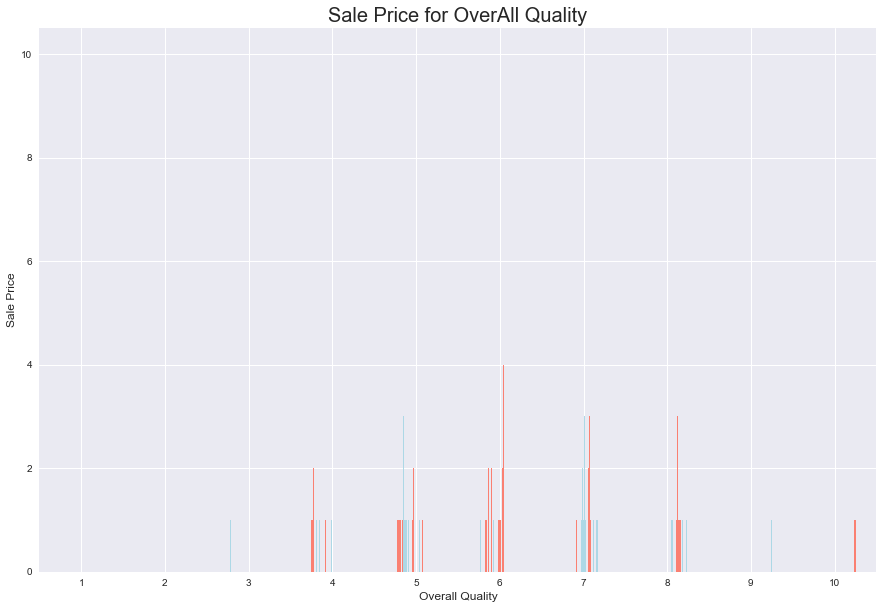

In [46]:
# Make the crosstab more visual
pd.crosstab(df.OverallQual, df["SalePrice"]).plot(kind="bar",
                                  figsize=(15,10),
                                  color=["salmon", "lightblue"], legend=False)

# Add some communication
plt.style.use("seaborn-pastel")
plt.title("Sale Price for OverAll Quality", fontsize=20)
plt.xlabel("Overall Quality", fontsize=12)
plt.ylabel("Sale Price", fontsize=12)
plt.xticks(rotation=0);

In [47]:
df.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
110000    13
          ..
263000     1
337000     1
156500     1
306000     1
206000     1
Name: SalePrice, Length: 663, dtype: int64

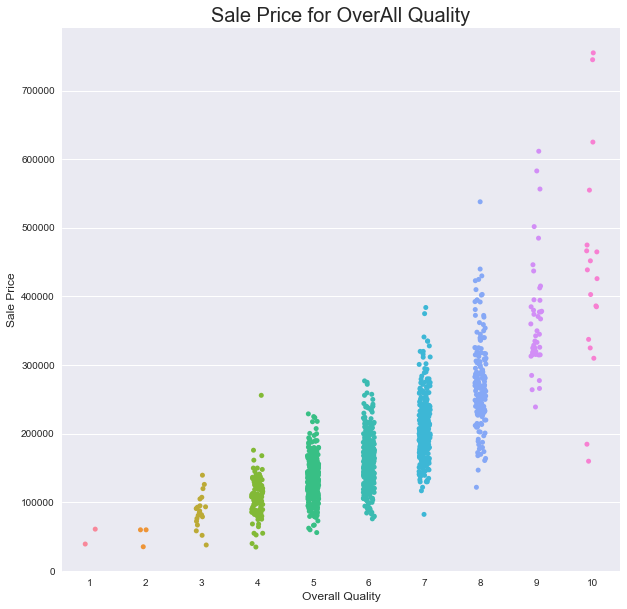

In [56]:
figure, ax = plt.subplots(figsize = (10,10))
sns.stripplot(data=df, x = 'OverallQual', y='SalePrice')
# sns.violinplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[1])
# sns.boxplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[2])
# Add some communication
plt.style.use("seaborn-pastel")
plt.title("Sale Price for OverAll Quality", fontsize=20)
plt.xlabel("Overall Quality", fontsize=12)
plt.ylabel("Sale Price", fontsize=12)
plt.xticks(rotation=0);
plt.show()

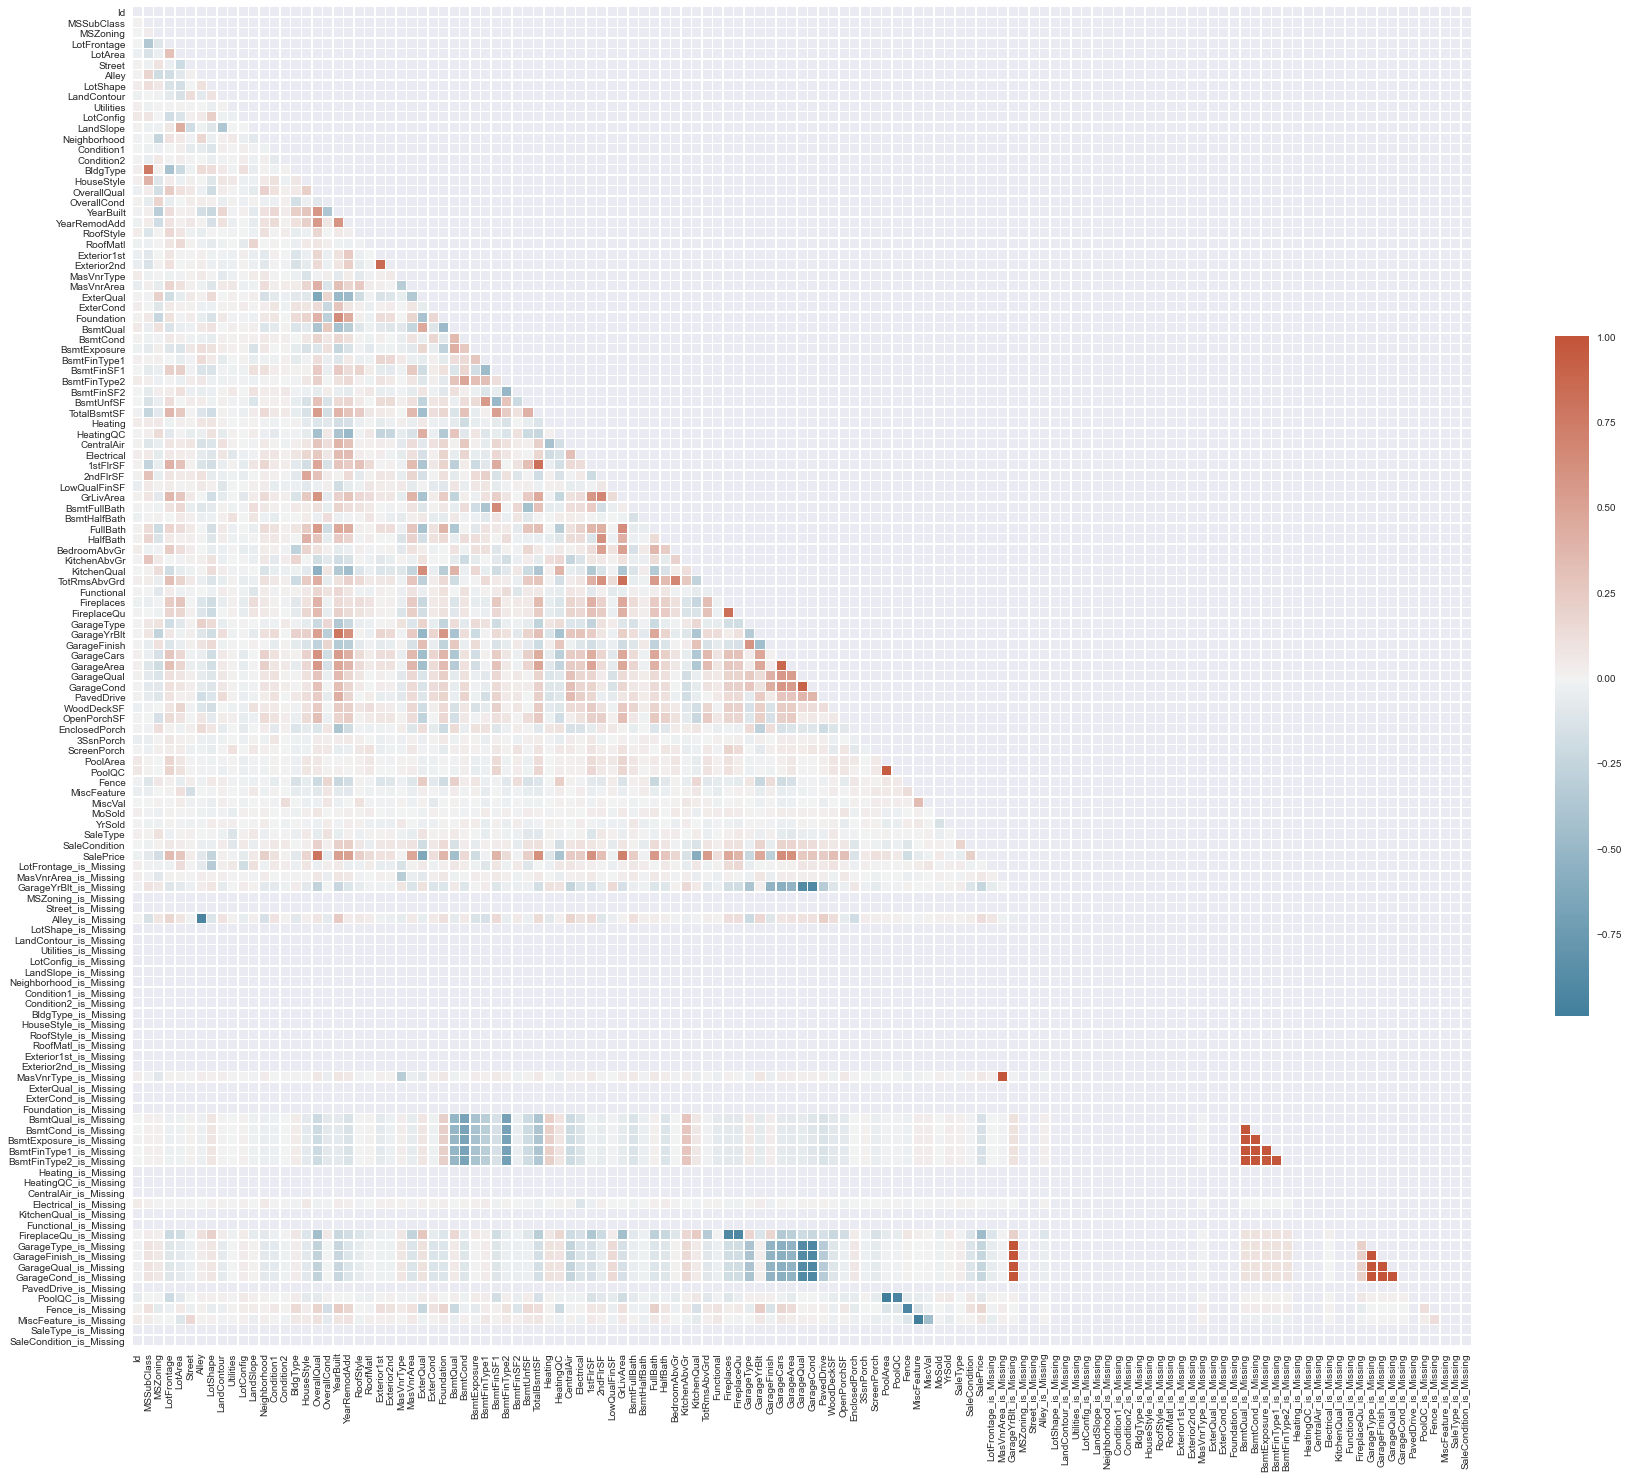

In [64]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot = False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [83]:
# Let's make our correaltion matrix
corr_mat = df.corr('pearson')['SalePrice'][:]

In [85]:
corr_mat

Id                         -0.021917
MSSubClass                 -0.084284
MSZoning                   -0.166872
LotFrontage                 0.334771
LotArea                     0.263843
                              ...   
PoolQC_is_Missing          -0.093708
Fence_is_Missing            0.172184
MiscFeature_is_Missing      0.072298
SaleType_is_Missing              NaN
SaleCondition_is_Missing         NaN
Name: SalePrice, Length: 127, dtype: float64

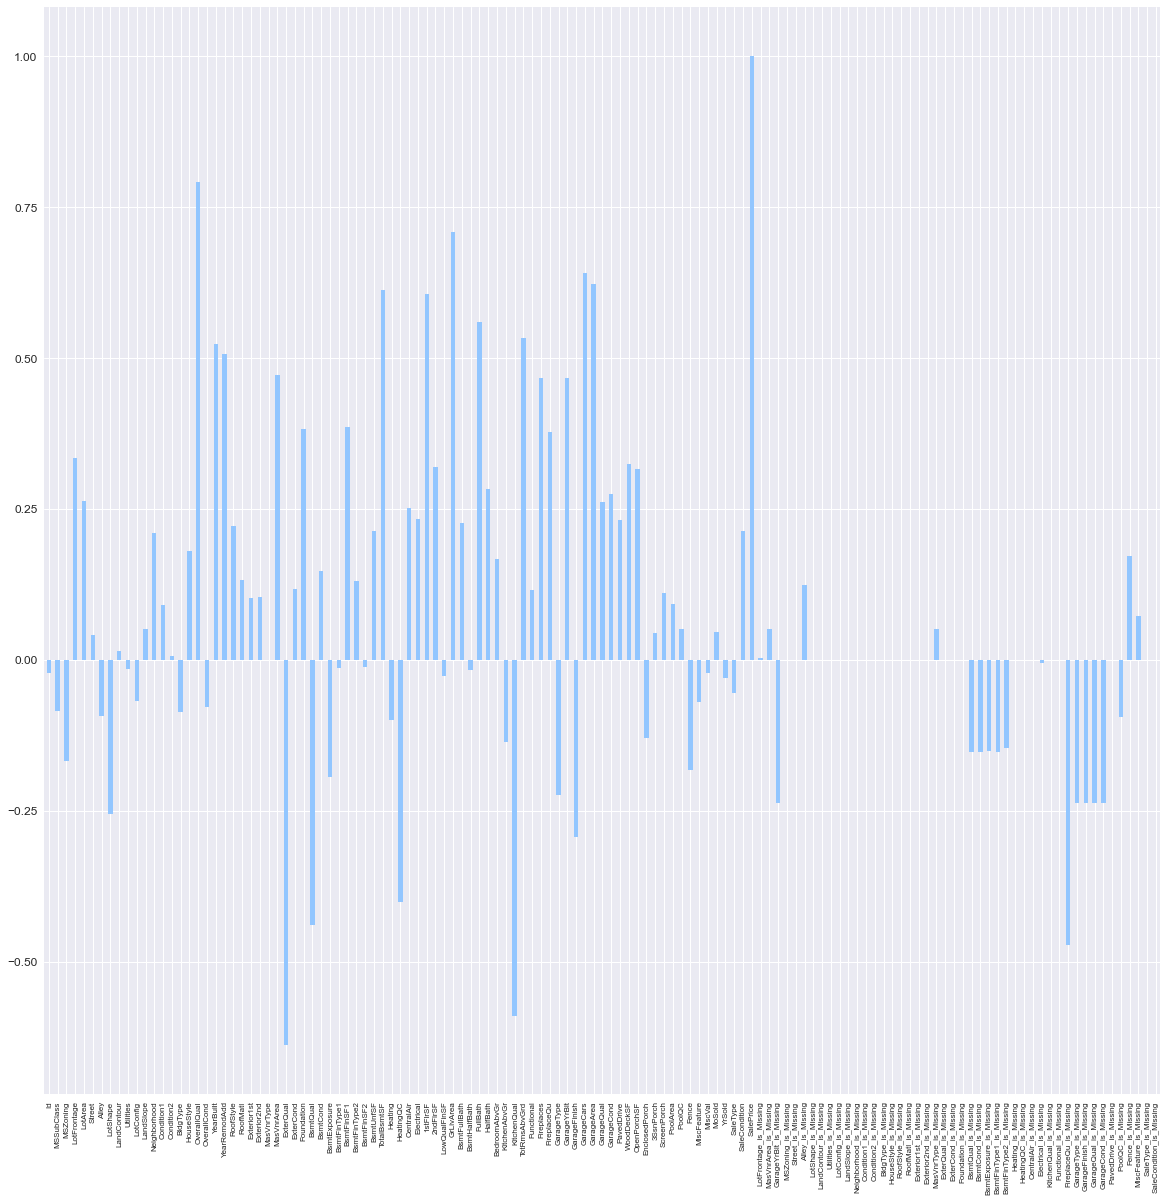

In [90]:
fig, ax = plt.subplots(figsize=(20,20))
corr_mat.plot.bar()
plt.xticks(fontsize=8)
plt.yticks(fontsize=12);